<a href="https://colab.research.google.com/github/Monisathi/ML-Projects/blob/main/Cat_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"monisai","key":"0f5aac2c0feaf2f358bb867e83e53573"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                Global Country Information Dataset 2023           23KB  2023-07-08 20:37:33           5642        197  1.0              
alphiree/cardiovascular-diseases-risk-prediction-dataset    Cardiovascular Diseases Risk Prediction Dataset    5MB  2023-07-03 12:12:19           6621        250  1.0              
arnavsmayan/netflix-userbase-dataset                        Netflix Userbase Dataset                          25KB  2023-07-04 07:38:41           6922        132  1.0              
joebeachcapital/top-10000-spotify-songs-1960-now            Top 10000 Songs on Spotify 1960-Now

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:03<00:00, 245MB/s]
100% 1.06G/1.06G [00:04<00:00, 285MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [10]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize the data
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [12]:
# Create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 82s 107ms/step - loss: 1.3363 - accuracy: 0.5710 - val_loss: 0.6330 - val_accuracy: 0.6540
Epoch 2/10
625/625 [==============================] - 78s 124ms/step - loss: 0.6216 - accuracy: 0.6684 - val_loss: 0.7409 - val_accuracy: 0.5834
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5241 - accuracy: 0.7307 - val_loss: 0.5556 - val_accuracy: 0.7190
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4592 - accuracy: 0.7704 - val_loss: 0.5264 - val_accuracy: 0.7476
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4135 - accuracy: 0.7958 - val_loss: 0.4982 - val_accuracy: 0.7672
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3690 - accuracy: 0.8210 - val_loss: 0.4770 - val_accuracy: 0.7978
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3061 - accuracy: 0.8498 - val_loss: 0.5131 - val_ac

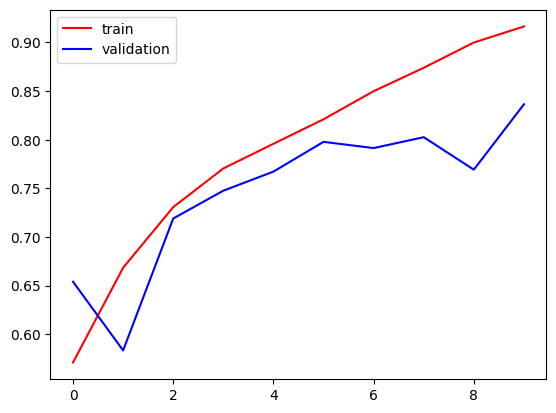

In [16]:
# Visualization of train and test accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

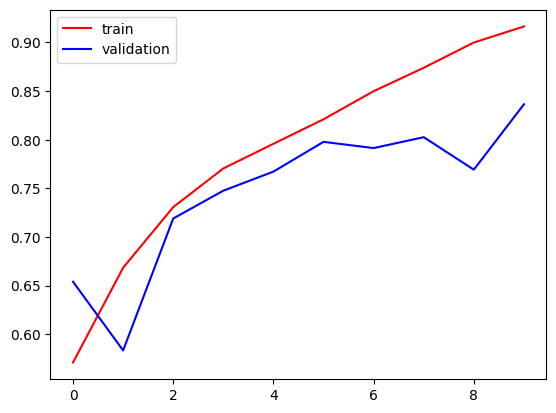

In [17]:
# Visualization of train and test loss
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [25]:
import cv2

#Cat image
test_img = cv2.imread('/content/train/cats/cat.1002.jpg')

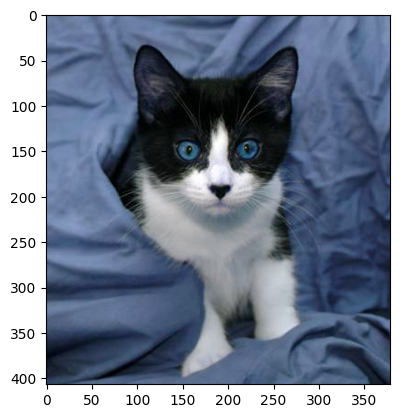

In [26]:
plt.imshow(test_img)
plt.show()

In [27]:
test_img.shape

(407, 379, 3)

In [28]:
# Resizing the image

test_img = cv2.resize(test_img,(256,256))

In [29]:
test_input = test_img.reshape((1,256,256,3))

In [30]:
# Prediction

model.predict(test_input)

1/1 [==============================] - 0s 373ms/step


array([[0.]], dtype=float32)

In [57]:
#Dog image
test_img = cv2.imread('/content/train/dogs/dog.10023.jpg')

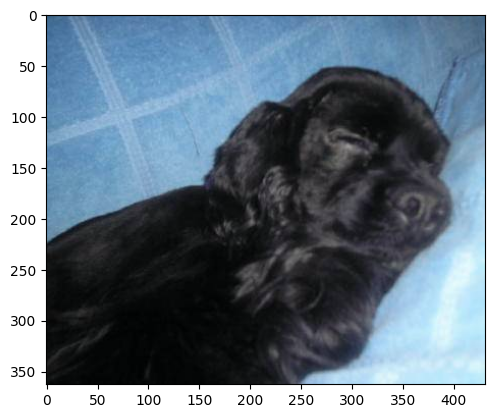

In [58]:
plt.imshow(test_img)
plt.show()

In [59]:
test_img.shape

(363, 431, 3)

In [60]:
# Resizing the image

test_img = cv2.resize(test_img,(256,256))

In [61]:
test_input = test_img.reshape((1,256,256,3))

In [62]:
# Prediction

model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)